In [104]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import os

from scipy.stats import linregress
from scipy import stats

In [105]:
# read in csvs
circuits = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/circuits.csv", na_values=r'\N')
constructor_results = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/constructor_results.csv", na_values=r'\N')
constructor_standings = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/constructor_standings.csv", na_values=r'\N')
constructors = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/constructors.csv", na_values=r'\N')
driver_standings = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/driver_standings.csv", na_values=r'\N')
drivers = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/drivers.csv", na_values=r'\N')
pit_stops = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/pit_stops.csv", na_values=r'\N')
qualifying = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/qualifying.csv", na_values=r'\N')
races = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/races.csv", na_values=r'\N')
seasons = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/seasons.csv", na_values=r'\N')
sprint_results = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/sprint_results.csv", na_values=r'\N')
status = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/status.csv", na_values=r'\N')
results = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/results.csv/results.csv", na_values=r'\N')

In [106]:
driver_standings

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
33897,71841,1098,840,0.0,16,16,0
33898,71842,1098,852,0.0,17,17,0
33899,71843,1098,830,0.0,18,18,0
33900,71844,1098,856,0.0,19,19,0


In [107]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47.0,12,16.0,16,16,0.0,57,NaN,NaN,39.0,12.0,1:29.833,211.632,11
25836,25842,1096,825,210,20.0,16,17.0,17,17,0.0,57,NaN,NaN,40.0,20.0,1:31.158,208.556,11
25837,25843,1096,1,131,44.0,5,18.0,18,18,0.0,55,NaN,NaN,42.0,11.0,1:29.788,211.738,9
25838,25844,1096,849,3,6.0,20,19.0,19,19,0.0,55,NaN,NaN,45.0,14.0,1:30.309,210.517,130


In [108]:
# Rename columns for later merging 
circuits = circuits.rename(columns={'name':'circuitName','location':'circuitLocation','country':'circuitCountry','url':'circuitUrl'})
drivers = drivers.rename(columns={'nationality':'driverNationality','url':'driverUrl'})
drivers['driverName'] = drivers['forename']+' '+drivers['surname']
constructors = constructors.rename(columns={'name':'constructorName','nationality':'constructorNationality','url':'constructorUrl'})
pit_stops = pit_stops.rename(columns={'time':'pitTime'})

In [109]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1


In [110]:
# locate the races and pit stops we need 
df = results.loc[results["raceId"].between(1052,1073)].copy()
df2 = pit_stops.loc[pit_stops["raceId"].between(1052, 1073)].copy()

In [111]:
#df_filtered = df.loc[df['milliseconds'] > 60000]
#df_filtered.head()

In [112]:
#df2_filtered = df2.loc[df2['milliseconds'] < 60000]
#df2_filtered.head()

In [113]:
# Replace weird '\\N' values as na's
#df.replace(to_replace = '\\N', value = 'NaN', inplace = True)
#df2.replace(to_replace = '\\N', value = 'NaN', inplace = True)

In [114]:
# this df is from Results and contains only the races we need 
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
24960,24966,1052,1,131,44.0,2,1.0,1,1,25.0,56,1:32:03.897,5523897.0,44.0,4.0,1:34.015,207.235,1
24961,24967,1052,830,9,33.0,1,2.0,2,2,18.0,56,+0.745,5524642.0,41.0,2.0,1:33.228,208.984,1
24962,24968,1052,822,131,77.0,3,3.0,3,3,16.0,56,+37.383,5561280.0,56.0,1.0,1:32.090,211.566,1
24963,24969,1052,846,1,4.0,7,4.0,4,4,12.0,56,+46.466,5570363.0,38.0,6.0,1:34.396,206.398,1
24964,24970,1052,815,9,11.0,0,5.0,5,5,10.0,56,+52.047,5575944.0,44.0,3.0,1:33.970,207.334,1


In [115]:
# change dtype for milliseconds
df.astype({"milliseconds": "float"})

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
24960,24966,1052,1,131,44.0,2,1.0,1,1,25.0,56,1:32:03.897,5523897.0,44.0,4.0,1:34.015,207.235,1
24961,24967,1052,830,9,33.0,1,2.0,2,2,18.0,56,+0.745,5524642.0,41.0,2.0,1:33.228,208.984,1
24962,24968,1052,822,131,77.0,3,3.0,3,3,16.0,56,+37.383,5561280.0,56.0,1.0,1:32.090,211.566,1
24963,24969,1052,846,1,4.0,7,4.0,4,4,12.0,56,+46.466,5570363.0,38.0,6.0,1:34.396,206.398,1
24964,24970,1052,815,9,11.0,0,5.0,5,5,10.0,56,+52.047,5575944.0,44.0,3.0,1:33.970,207.334,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25395,25401,1073,849,3,6.0,16,NaN,R,16,0.0,50,NaN,NaN,30.0,15.0,1:29.293,212.912,3
25396,25402,1073,841,51,99.0,14,NaN,R,17,0.0,33,NaN,NaN,33.0,16.0,1:29.442,212.557,6
25397,25403,1073,847,3,63.0,17,NaN,R,18,0.0,26,NaN,NaN,23.0,19.0,1:30.647,209.732,6
25398,25404,1073,8,51,7.0,18,NaN,R,19,0.0,25,NaN,NaN,23.0,18.0,1:29.698,211.951,23


In [116]:
# This df is from pit stops and contains only the pit stop info relavant to the races we're analyzing 
df2.head()

,raceId,driverId,stop,lap,pitTime,duration,milliseconds
8030,1052,815,1,2,18:11:56,23.993,23993
8031,1052,842,1,4,18:16:14,38.338,38338
8032,1052,4,1,11,18:27:32,24.373,24373
8033,1052,846,1,12,18:29:05,24.899,24899
8034,1052,844,1,12,18:29:06,24.925,24925


In [117]:
df2.dtypes

raceId           int64
driverId         int64
stop             int64
lap              int64
pitTime         object
duration        object
milliseconds     int64
dtype: object

In [118]:
# change dtype for milliseconds
df.astype({"milliseconds": "float"})

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
24960,24966,1052,1,131,44.0,2,1.0,1,1,25.0,56,1:32:03.897,5523897.0,44.0,4.0,1:34.015,207.235,1
24961,24967,1052,830,9,33.0,1,2.0,2,2,18.0,56,+0.745,5524642.0,41.0,2.0,1:33.228,208.984,1
24962,24968,1052,822,131,77.0,3,3.0,3,3,16.0,56,+37.383,5561280.0,56.0,1.0,1:32.090,211.566,1
24963,24969,1052,846,1,4.0,7,4.0,4,4,12.0,56,+46.466,5570363.0,38.0,6.0,1:34.396,206.398,1
24964,24970,1052,815,9,11.0,0,5.0,5,5,10.0,56,+52.047,5575944.0,44.0,3.0,1:33.970,207.334,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25395,25401,1073,849,3,6.0,16,NaN,R,16,0.0,50,NaN,NaN,30.0,15.0,1:29.293,212.912,3
25396,25402,1073,841,51,99.0,14,NaN,R,17,0.0,33,NaN,NaN,33.0,16.0,1:29.442,212.557,6
25397,25403,1073,847,3,63.0,17,NaN,R,18,0.0,26,NaN,NaN,23.0,19.0,1:30.647,209.732,6
25398,25404,1073,8,51,7.0,18,NaN,R,19,0.0,25,NaN,NaN,23.0,18.0,1:29.698,211.951,23


In [119]:
# Merge the filtered results and pit stops onto one df
df3 = pd.merge(df, df2, on=["raceId", "driverId"],how="right")
df3

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,stop,lap,pitTime,duration,milliseconds_y
0,24970,1052,815,9,11.0,0,5.0,5,5,10.0,...,44.0,3.0,1:33.970,207.334,1,1,2,18:11:56,23.993,23993
1,24982,1052,842,213,10.0,5,17.0,17,17,0.0,...,48.0,5.0,1:34.090,207.069,31,1,4,18:16:14,38.338,38338
2,24984,1052,4,214,14.0,9,NaN,R,19,0.0,...,31.0,17.0,1:36.063,202.816,23,1,11,18:27:32,24.373,24373
3,24969,1052,846,1,4.0,7,4.0,4,4,12.0,...,38.0,6.0,1:34.396,206.398,1,1,12,18:29:05,24.899,24899
4,24971,1052,844,6,16.0,4,6.0,6,6,8.0,...,39.0,11.0,1:34.988,205.112,1,1,12,18:29:06,24.925,24925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,25398,1073,840,117,18.0,13,13.0,13,13,0.0,...,48.0,13.0,1:28.567,214.657,11,2,52,18:22:55,22.661,22661
764,25400,1073,815,9,11.0,4,15.0,15,15,0.0,...,51.0,2.0,1:26.419,219.993,5,3,53,18:23:09,21.385,21385
765,25399,1073,854,210,47.0,19,14.0,14,14,0.0,...,42.0,17.0,1:29.457,212.522,11,2,52,18:23:42,22.070,22070
766,25389,1073,852,213,22.0,8,4.0,4,4,12.0,...,50.0,7.0,1:27.496,217.285,1,2,53,18:24:01,21.909,21909


In [120]:
# rename the column 
df3 = df3.rename(columns={"driverId_x": "driverId"})

In [121]:
# Merge this df with the drivers csv
df3 = pd.merge(df3, drivers, on=["driverId"] ,how="left")
df3

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,milliseconds_y,driverRef,number_y,code,forename,surname,dob,driverNationality,driverUrl,driverName
0,24970,1052,815,9,11.0,0,5.0,5,5,10.0,...,23993,perez,11.0,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,Sergio Pérez
1,24982,1052,842,213,10.0,5,17.0,17,17,0.0,...,38338,gasly,10.0,GAS,Pierre,Gasly,1996-02-07,French,http://en.wikipedia.org/wiki/Pierre_Gasly,Pierre Gasly
2,24984,1052,4,214,14.0,9,NaN,R,19,0.0,...,24373,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
3,24969,1052,846,1,4.0,7,4.0,4,4,12.0,...,24899,norris,4.0,NOR,Lando,Norris,1999-11-13,British,http://en.wikipedia.org/wiki/Lando_Norris,Lando Norris
4,24971,1052,844,6,16.0,4,6.0,6,6,8.0,...,24925,leclerc,16.0,LEC,Charles,Leclerc,1997-10-16,Monegasque,http://en.wikipedia.org/wiki/Charles_Leclerc,Charles Leclerc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,25398,1073,840,117,18.0,13,13.0,13,13,0.0,...,22661,stroll,18.0,STR,Lance,Stroll,1998-10-29,Canadian,http://en.wikipedia.org/wiki/Lance_Stroll,Lance Stroll
764,25400,1073,815,9,11.0,4,15.0,15,15,0.0,...,21385,perez,11.0,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,Sergio Pérez
765,25399,1073,854,210,47.0,19,14.0,14,14,0.0,...,22070,mick_schumacher,47.0,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher,Mick Schumacher
766,25389,1073,852,213,22.0,8,4.0,4,4,12.0,...,21909,tsunoda,22.0,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda,Yuki Tsunoda


In [122]:
df3 = df3.loc[df3['milliseconds_y'] <= 90000]
df3

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,milliseconds_y,driverRef,number_y,code,forename,surname,dob,driverNationality,driverUrl,driverName
0,24970,1052,815,9,11.0,0,5.0,5,5,10.0,...,23993,perez,11.0,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,Sergio Pérez
1,24982,1052,842,213,10.0,5,17.0,17,17,0.0,...,38338,gasly,10.0,GAS,Pierre,Gasly,1996-02-07,French,http://en.wikipedia.org/wiki/Pierre_Gasly,Pierre Gasly
2,24984,1052,4,214,14.0,9,NaN,R,19,0.0,...,24373,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
3,24969,1052,846,1,4.0,7,4.0,4,4,12.0,...,24899,norris,4.0,NOR,Lando,Norris,1999-11-13,British,http://en.wikipedia.org/wiki/Lando_Norris,Lando Norris
4,24971,1052,844,6,16.0,4,6.0,6,6,8.0,...,24925,leclerc,16.0,LEC,Charles,Leclerc,1997-10-16,Monegasque,http://en.wikipedia.org/wiki/Charles_Leclerc,Charles Leclerc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,25398,1073,840,117,18.0,13,13.0,13,13,0.0,...,22661,stroll,18.0,STR,Lance,Stroll,1998-10-29,Canadian,http://en.wikipedia.org/wiki/Lance_Stroll,Lance Stroll
764,25400,1073,815,9,11.0,4,15.0,15,15,0.0,...,21385,perez,11.0,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,Sergio Pérez
765,25399,1073,854,210,47.0,19,14.0,14,14,0.0,...,22070,mick_schumacher,47.0,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher,Mick Schumacher
766,25389,1073,852,213,22.0,8,4.0,4,4,12.0,...,21909,tsunoda,22.0,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda,Yuki Tsunoda


In [123]:
# Group by driver specific code to get mean milliseconds. Dividing by 60,000 puts it into minutes 
df4 = df3.groupby(['code'])['milliseconds_y'].mean()/1000
df4

code
ALO    24.901529
BOT    24.117353
GAS    26.138647
GIO    26.807289
HAM    24.814949
KUB    22.104500
LAT    24.363000
LEC    23.860677
MAZ    27.187694
MSC    27.993114
NOR    24.337688
OCO    27.413037
PER    23.974135
RAI    26.368593
RIC    24.598161
RUS    25.108545
SAI    24.663267
STR    26.336700
TSU    26.281969
VER    23.790667
VET    25.339333
Name: milliseconds_y, dtype: float64

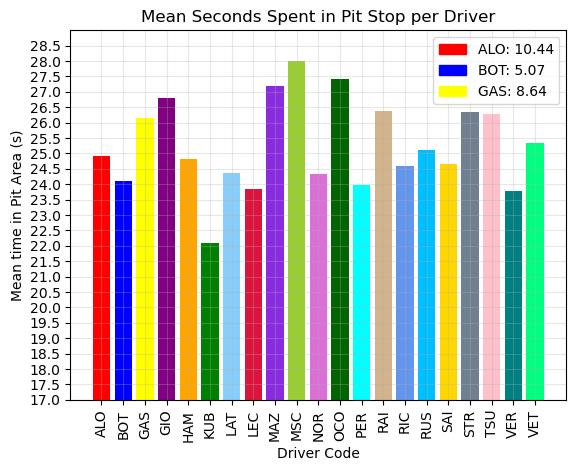

<Figure size 6000x6000 with 0 Axes>

In [130]:
# Plot drivers against their pit stop times 
drivers = ['ALO', 'BOT', 'GAS', 'GIO', 'HAM', 'KUB', 'LAT', 'LEC', 'MAZ', 'MSC', 'NOR',  'OCO', 'PER', 'RAI', 'RIC', 'RUS', 'SAI', 'STR','TSU','VER','VET']


plt.bar(drivers, df4, align='center', color = ['red', 'blue', 'yellow', 'purple', 'orange', 'green', 'lightskyblue',
                                              'crimson', 'blueviolet', 'yellowgreen', 'orchid', 'darkgreen', 
                                              'cyan', 'tan', 'cornflowerblue', 'deepskyblue', 'gold', 'slategray',
                                              'pink', 'teal', 'springgreen'])
# Add customization
plt.xticks(rotation='vertical')
plt.title('Mean Seconds Spent in Pit Stop per Driver')
plt.ylabel('Mean time in Pit Area (s)')
plt.ylim(17,29)
list_yticks = np.arange(17, 29, 0.5)
plt.yticks(list_yticks)
plt.xlabel('Driver Code')
plt.grid(alpha = 0.3)

#Legend
red_patch = mpatches.Patch(color='red', label='ALO: 10.44')
blue_patch = mpatches.Patch(color='blue', label='BOT: 5.07')
yellow_patch = mpatches.Patch(color='yellow', label= 'GAS: 8.64')

plt.legend(handles=[red_patch, blue_patch, yellow_patch], loc='best')

plt.figure(figsize=(60,60))
plt.show()

In [76]:
df5 = df3.groupby(['code'])['positionOrder'].mean()
df5

code
ALO    10.441176
BOT     5.705882
GAS     8.647059
GIO    13.184211
HAM     3.102564
KUB    14.500000
LAT    15.612903
LEC     6.741935
MAZ    17.250000
MSC    16.342857
NOR     6.875000
OCO    10.037037
PER     6.810811
RAI    11.962963
RIC     9.354839
RUS    14.242424
SAI     6.466667
STR    11.966667
TSU    12.031250
VER     3.250000
VET    12.638889
Name: positionOrder, dtype: float64

In [ ]:
# Take 2
#drivers = ['ALO', 'BOT', 'GAS', 'GIO', 'HAM', 'KUB', 'LAT', 'LEC', 'MAZ', 'MSC', 'NOR',  'OCO', 'PER', 'RAI', 'RIC', 'RUS', 'SAI', 'STR','TSU','VER','VET'] 

#plt.barh(drivers, df4, align='center', color = ['red', 'blue', 'yellow', 'purple', 'orange', 'green', 'lightskyblue',
                                              #'crimson', 'blueviolet', 'yellowgreen', 'orchid', 'darkgreen', 
                                              #'cyan', 'tan', 'cornflowerblue', 'deepskyblue', 'gold', 'slategray',
                                              #'pink', 'teal', 'springgreen'])

#plt.xticks(np.arange(0, 6, 0.4))
#plt.title('Mean Minutes spent in Pit Stop per Driver') 
#plt.xlabel('Mean Pit Stop Time (m)')
#plt.ylabel('Driver Code')
#plt.grid(alpha=0.3)
#plt.show

## FIGURE OUT A WAY TO INCLUDE FINISHING POSITION ON THIS BAR CHART

In [69]:
# Make a box plot of this to see if there are outliers 
#analysis = {'driver_codes':['ALO', 'BOT', 'GAS', 'GIO', 'HAM', 'KUB', 'LAT', 'LEC', 'MAZ', 'MSC', 'NOR',  'OCO', 'PER', 'RAI', 
                # 'RIC', 'RUS', 'SAI', 'STR','TSU','VER','VET'], 'mean_min':[4.160327, 3.065694, 4.151252, 3.848033, 3.719853, 0.368408, 3.916359, 3.932462, 3.596544, 3.439388, 3.855975, 
          #  4.073816, 3.067354, 4.974586, 4.479850, 3.340720, 4.605692, 3.173515, 4.373820, 2.507558, 3.961556],
           #'position_mean':[10.200000, 5.657895, 8.300000, 12.954545, 3.177778, 14.500000, 15.138889, 6.472222, 17.097561, 16.179487,
               #  6.810811, 9.312500, 7.243902, 12.151515, 8.945946, 14.216216, 6.444444, 11.676471, 11.789474, 3.275000, 12.928571]}

#analysis_df = pd.DataFrame(analysis)
#analysis_df

In [22]:
# ?
driver_colors = {
    'ALO':'#6CD3BF',
    'BOT':'#1E5BC6',
    'GAS':'#ED1C24',
    'GIO':'#37BEDD',
    'HAM':'#FF80C7',
    'KUB':'#c82e37',
    'LAT':'#FFD800',
    'LEC':'#F58020',
    'MAZ':'#006EFF',
    'MSC':'#FFB800',
    'NOR':'#b2945e',
    'OCO':'#0b361f',
    'PER':'#FFB800',
    'RAI':'#6E0000',
    'RIC':'#6E0000',
    'RUS':'#B6BABD',
    'SAI':'#F596C8',
    'STR':'#2D826D',
    'TSU':'#B12039',
    'VER':'#4E7C9B',
    'VET':'#2293D1'
}

In [23]:
# James TA attempt
driver_colors = {
    'ALO': 'red',
    'BOT': 'green'
}

In [24]:
driver_colors

{'ALO': 'red', 'BOT': 'green'}

In [25]:
df5

code
ALO    10.200000
BOT     5.657895
GAS     8.300000
GIO    12.954545
HAM     3.177778
KUB    14.500000
LAT    15.138889
LEC     6.472222
MAZ    17.097561
MSC    16.179487
NOR     6.810811
OCO     9.312500
PER     7.243902
RAI    12.151515
RIC     8.945946
RUS    14.216216
SAI     6.444444
STR    11.676471
TSU    11.789474
VER     3.275000
VET    12.928571
Name: positionOrder, dtype: float64

In [73]:
#df4 is drivers grouped by code and mean seconds, df5 drivers grouped by code and mean position order 
#x = df5
#y = df4
#plt.scatter(x, y)
#plt.title('Correlation Between Mean Pit Stop Time and Finishing Position')
#plt.xlabel("Finishing Position")
#plt.ylabel('Mean Pit Stop Time (s)')

#plt.show()

In [74]:
# Run a linear regression on the scatter chart above
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x,y)

#regress_values = x * slope + intercept

#create line equation
#line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print line equation
#print(line_eq)

The r-value is: 0.008388156908246831


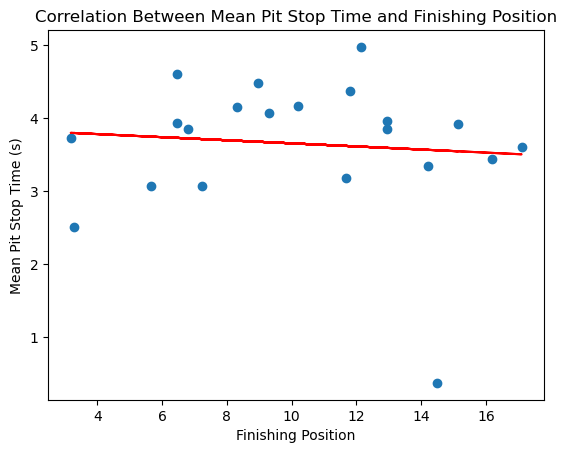

In [28]:
#plt.plot(x_values_north, regress_values_north, "r")

x = df5
y = df4
plt.scatter(x, y)
plt.plot(x, regress_values, "r")
plt.annotate(line_eq, (10,5000), fontsize=15, color='r')
plt.title('Correlation Between Mean Pit Stop Time and Finishing Position')
plt.xlabel("Finishing Position")
plt.ylabel('Mean Pit Stop Time (s)')

#Print the r value
print(f"The r-value is: {rvalue**2}")

plt.show()

In [32]:
#How would a bar chart look?
#x = df5
#y = df4
#plt.bar(x, y)
#plt.show()

In [29]:
# df3 = results, pit stops, and drivers 
df3 = df3.rename(columns={"driverId_x": "driverId"})

In [36]:
#df3 = pd.merge(df3, drivers, on="driverId",how="left")
#df3

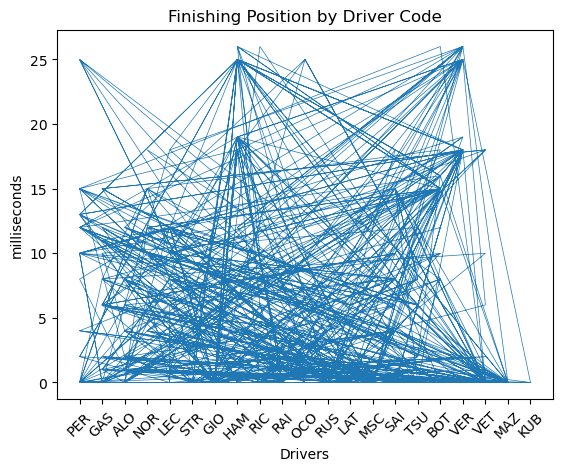

In [31]:
# Graph driver code against their finishing positions
code = df3["code"]
time = df3["points"]  

plt.title('Finishing Position by Driver Code')
plt.plot(code, time,linewidth=0.5,)
plt.xlabel('Drivers')
plt.ylabel('milliseconds')
plt.xticks(rotation=45)
plt.show()

In [32]:
df5 = df3.groupby('code')['points']
df5.count()

code
ALO    40
BOT    38
GAS    40
GIO    44
HAM    45
KUB     2
LAT    36
LEC    36
MAZ    41
MSC    39
NOR    37
OCO    32
PER    41
RAI    33
RIC    37
RUS    37
SAI    36
STR    34
TSU    38
VER    40
VET    42
Name: points, dtype: int64

ValueError: x and y must have same first dimension, but have shapes (768,) and (1,)

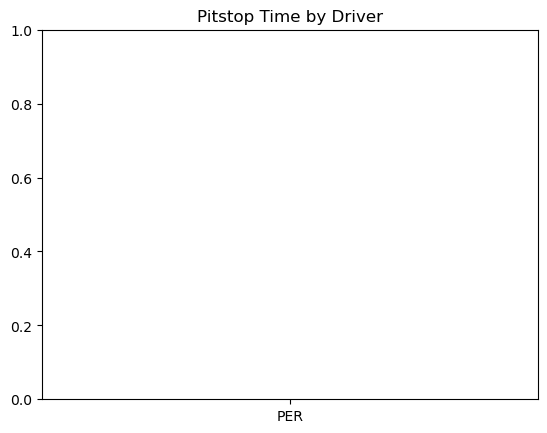

In [33]:
code = df3["code"]
time = df3["points"].count()

plt.title('Pitstop Time by Driver')
plt.plot(code, time,linewidth=3,)
plt.xlabel('Drivers')
plt.ylabel('milliseconds')
plt.xticks(rotation=45)
plt.show()

In [34]:
df4 = df3.groupby('code').describe()
df4

resultId                                                                  \
        count          mean         std      min       25%      50%       75%   
code                                                                            
ALO      40.0  25173.200000  137.601282  24984.0  25054.00  25160.5  25303.00   
BOT      38.0  25182.236842  141.702283  24968.0  25040.25  25208.0  25320.00   
GAS      40.0  25156.300000  137.351916  24982.0  25030.00  25156.0  25279.50   
GIO      44.0  25165.227273  127.516686  24977.0  25051.25  25168.0  25264.75   
HAM      45.0  25157.955556  129.773922  24966.0  25052.00  25146.0  25270.00   
KUB       2.0  25229.500000   13.435029  25220.0  25224.75  25229.5  25234.25   
LAT      36.0  25190.138889  132.604493  24983.0  25075.75  25172.0  25322.00   
LEC      36.0  25178.138889  142.657462  24971.0  25059.00  25147.0  25315.00   
MAZ      41.0  25162.097561  120.276724  25002.0  25062.00  25144.0  25263.00   
MSC      39.0  25157.589744  131.842952  24981.0  25043.00  25143.0  25274.50   
NOR      37.0  25183.162162  144.701323  24969.0  25048.00  25180.0  25335.00   
OCO      32.0  25159.312500  142.433105  24978.0  25012.00  25160.0  25304.00   
PER      41.0  25176.634146  142.452581  24970.0  25049.00  25161.0  25308.00   
RAI      33.0  25188.666667  136.482752  24976.0  25075.00  25175.0  25313.00   
RIC      37.0  25175.027027  137.459183  24972.0  25057.00  25176.0  25290.00   
RUS      37.0  25170.567568  123.876628  24979.0  25082.00  25157.0  25280.00   
SAI      36.0  25167.000000  132.827923  24973.0  25043.25  25159.5  25292.00   
STR      34.0  25186.088235  147.936589  24975.0  25036.00  25185.0  25319.00   
TSU      38.0  25186.263158  139.304000  24974.0  25072.00  25171.0  25328.50   
VER      40.0  25175.275000  137.007765  24967.0  25041.25  25174.0  25291.00   
VET      42.0  25169.833333  130.468558  24980.0  25041.00  25174.5  25283.00   

              raceId               ... milliseconds_y            number_y  \
          max  count         mean  ...            75%        max    count   
code                               ...                                      
ALO   25393.0   40.0  1062.075000  ...       30742.50  2058580.0     40.0   
BOT   25391.0   38.0  1062.842105  ...       29229.00  2049149.0     38.0   
GAS   25390.0   40.0  1061.325000  ...       32005.50  2067244.0     40.0   
GIO   25402.0   44.0  1061.522727  ...       32714.50  2070250.0     44.0   
HAM   25387.0   45.0  1061.622222  ...       30045.00  2048376.0     45.0   
KUB   25239.0    2.0  1064.500000  ...       23302.75    24501.0      2.0   
LAT   25401.0   36.0  1062.694444  ...       28101.00  2077164.0     36.0   
LEC   25395.0   36.0  1062.527778  ...       30849.00  2047731.0     36.0   
MAZ   25383.0   41.0  1061.195122  ...       30983.00  2076977.0     41.0   
MSC   25399.0   39.0  1061.000000  ...       34026.00  2075728.0     39.0   
NOR   25392.0   37.0  1062.783784  ...       30531.00  2052218.0     37.0   
OCO   25394.0   32.0  1061.437500  ...       34828.50  2066994.0     32.0   
PER   25400.0   41.0  1062.390244  ...       27848.00  2076405.0     41.0   
RAI   25404.0   33.0  1062.787879  ...       35451.00  2062984.0     33.0   
RIC   25397.0   37.0  1062.243243  ...       33617.00  2051281.0     37.0   
RUS   25384.0   37.0  1061.729730  ...       29983.00  2072543.0     37.0   
SAI   25388.0   36.0  1061.972222  ...       30750.25  2059122.0     36.0   
STR   25398.0   34.0  1062.676471  ...       30807.25  2067861.0     34.0   
TSU   25389.0   38.0  1062.657895  ...       31699.25  2075695.0     38.0   
VER   25386.0   40.0  1062.550000  ...       29634.25  1621361.0     40.0   
VET   25396.0   42.0  1061.761905  ...       31814.00  2055222.0     42.0   

                                               
      mean  std   min   25%   50%   75%   max  
code                                           
ALO   14.0  0.0  14.0  14.0  14.0  14.0  14.0  
BOT   77.0  0.0  77

In [35]:
df5.describe()

,count,mean,std,min,25%,50%,75%,max
code,,,,,,,,
ALO,40.0,3.550000,3.815958,0.0,0.0,2.0,6.50,12.0
BOT,38.0,11.500000,6.733338,0.0,8.0,15.0,15.00,26.0
GAS,40.0,5.700000,4.910481,0.0,1.0,6.0,10.00,15.0
GIO,44.0,0.113636,0.442819,0.0,0.0,0.0,0.00,2.0
HAM,45.0,18.577778,7.682592,0.0,18.0,19.0,25.00,26.0
KUB,2.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
LAT,36.0,0.500000,1.681836,0.0,0.0,0.0,0.00,6.0
LEC,36.0,8.444444,4.729509,0.0,6.0,10.0,12.00,18.0
MAZ,41.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0


In [36]:
HAM = df3[(df3['code'] == 'HAM')]
ALO = df3[(df3['code'] == 'ALO')]
BOT = df3[(df3['code'] == 'BOT')]
GAS = df3[(df3['code'] == 'GAS')]
GIO = df3[(df3['code'] == 'GIO')]
KUB = df3[(df3['code'] == 'KUB')]
LAT = df3[(df3['code'] == 'LAT')]
LEC = df3[(df3['code'] == 'LEC')]
MAZ = df3[(df3['code'] == 'MAZ')]
MSC = df3[(df3['code'] == 'MSC')]
NOR = df3[(df3['code'] == 'NOR')]
OCO = df3[(df3['code'] == 'OCO')]
PER = df3[(df3['code'] == 'PER')]
RAI = df3[(df3['code'] == 'RAI')]
RIC = df3[(df3['code'] == 'RIC')]
RUS = df3[(df3['code'] == 'RUS')]
SAI = df3[(df3['code'] == 'SAI')]
STR = df3[(df3['code'] == 'STR')]
TSU = df3[(df3['code'] == 'TSU')]
VER = df3[(df3['code'] == 'VER')]
VET = df3[(df3['code'] == 'VET')]
HAM

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,milliseconds_y,driverRef,number_y,code,forename,surname,dob,driverNationality,driverUrl,driverName
7,24966,1052,1,131,44.0,2,1.0,1,1,25.0,...,24839,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
21,24966,1052,1,131,44.0,2,1.0,1,1,25.0,...,24076,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
57,24987,1053,1,131,44.0,1,2.0,2,2,19.0,...,32112,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
65,24987,1053,1,131,44.0,1,2.0,2,2,19.0,...,38198,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
70,24987,1053,1,131,44.0,1,2.0,2,2,19.0,...,1494731,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
86,24987,1053,1,131,44.0,1,2.0,2,2,19.0,...,65870,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
97,25006,1054,1,131,44.0,2,1.0,1,1,25.0,...,22426,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
116,25006,1054,1,131,44.0,2,1.0,1,1,25.0,...,22164,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
148,25006,1054,1,131,44.0,2,1.0,1,1,25.0,...,26907,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
173,25026,1055,1,131,44.0,1,1.0,1,1,25.0,...,22220,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton


In [37]:
HAM = HAM['milliseconds_y']
HAM

7        24839
21       24076
57       32112
65       38198
70     1494731
86       65870
97       22426
116      22164
148      26907
173      22220
180      22078
193      23783
211      24244
222      22470
238      15432
254    2000923
282      30263
305      21219
316      21640
328      21005
342      21421
345    2048376
377      40266
389    1449259
417      21731
420      21516
434      21208
440      19770
457      18868
464      19202
474      25619
498      29878
517      30045
546      22684
563      24481
584      23676
596      22373
620      17910
640      18660
662      22690
684      22664
694      20580
702     995856
722    1086674
741      21595
Name: milliseconds_y, dtype: int64

In [38]:
ALO = ALO['milliseconds_y']
BOT = BOT['milliseconds_y']
GAS = GAS['milliseconds_y']
GIO = GIO['milliseconds_y']
KUB = KUB['milliseconds_y']
LAT = LAT['milliseconds_y']
LEC = LEC['milliseconds_y']
MAZ = MAZ['milliseconds_y']
MSC = MSC['milliseconds_y']
NOR = NOR['milliseconds_y']
OCO = OCO['milliseconds_y']
PER = PER['milliseconds_y']
RAI = RAI['milliseconds_y']
RIC = RIC['milliseconds_y']
RUS = RUS['milliseconds_y']
SAI = SAI['milliseconds_y']
STR = STR['milliseconds_y']
TSU = TSU['milliseconds_y']
VER = VER['milliseconds_y']
VET = VET['milliseconds_y']

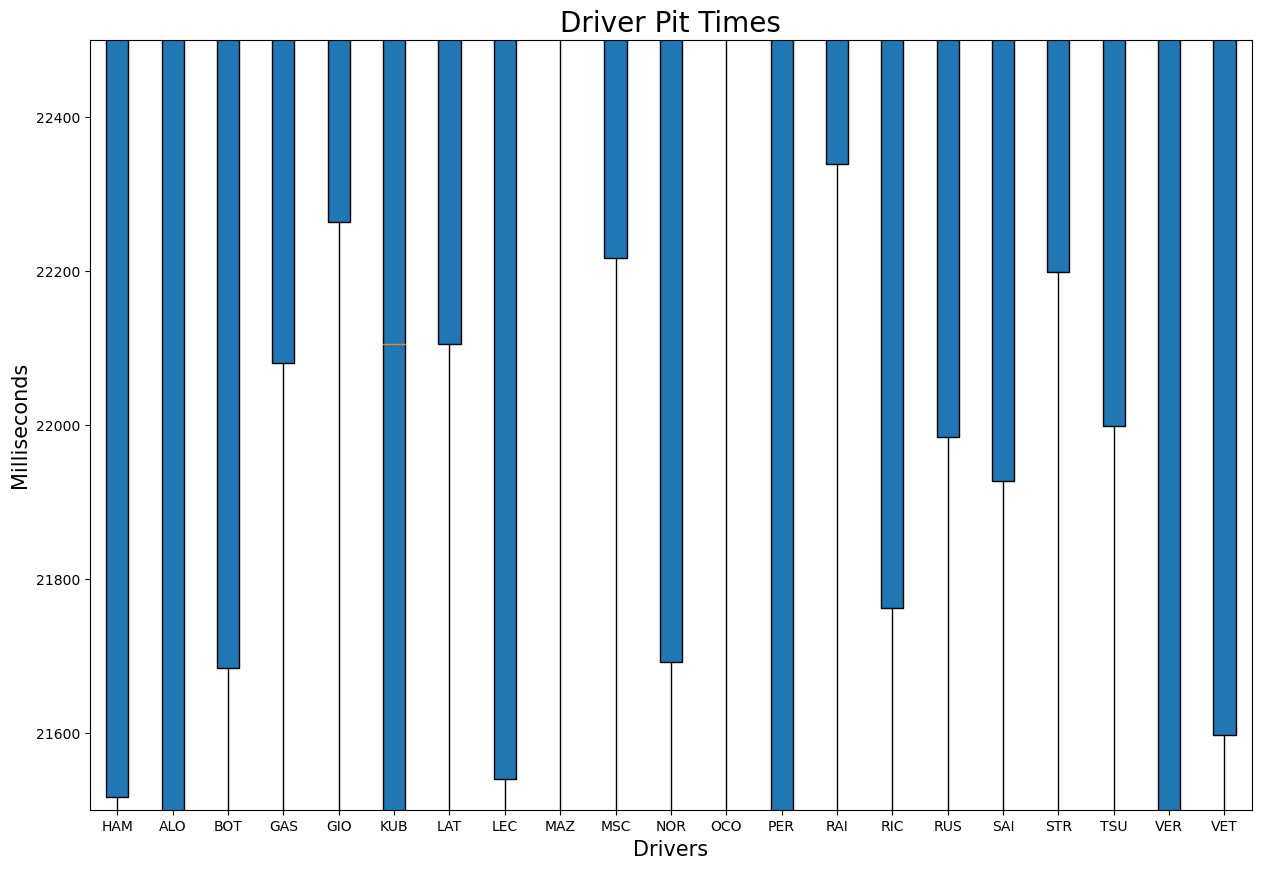

In [39]:
plot = [HAM, ALO, BOT, GAS, GIO, KUB, LAT, LEC, MAZ, MSC, NOR, OCO, PER, RAI, RIC, RUS, SAI, STR, TSU, VER, VET]
drivers = ["HAM", "ALO", "BOT", "GAS", "GIO", "KUB", "LAT", "LEC", "MAZ", "MSC", "NOR", "OCO", "PER", "RAI", "RIC", "RUS", "SAI", "STR", "TSU", "VER", "VET"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Driver Pit Times',fontsize =20)
ax1.set_ylabel('Milliseconds',fontsize = 15)
ax1.set_xlabel('Drivers',fontsize = 15)
ax1.boxplot(plot, 0, labels=drivers, widths = 0.4, patch_artist=True,vert=True)
ax1.set_ylim(21500,22500)

plt.show()

In [40]:
plot = [HAM['milliseconds_y'].count()]
Regimen = ["HAM"]
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Driver Pit Times',fontsize =20)
ax1.set_ylabel('Milliseconds',fontsize = 15)
ax1.set_xlabel('Drivers',fontsize = 15)
ax1.boxplot(plot, 0, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)


plt.show()

KeyError: 'milliseconds_y'

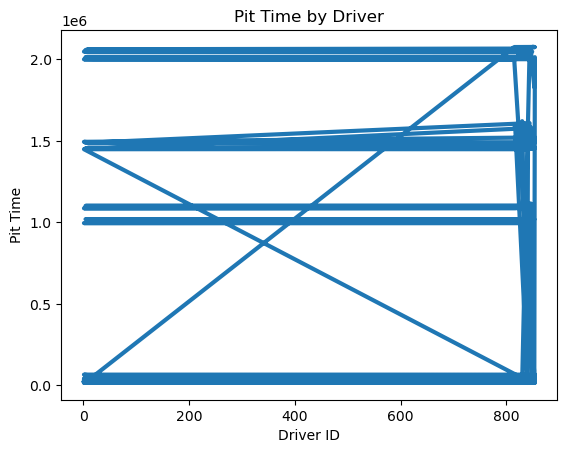

In [41]:
df2_line = df2["driverId"]
pit = df2["milliseconds"]

plt.title('Pit Time by Driver')
plt.plot(df2_line, pit,linewidth=3,)
plt.xlabel('Driver ID')
plt.ylabel('Pit Time')

plt.show()

In [42]:
df5

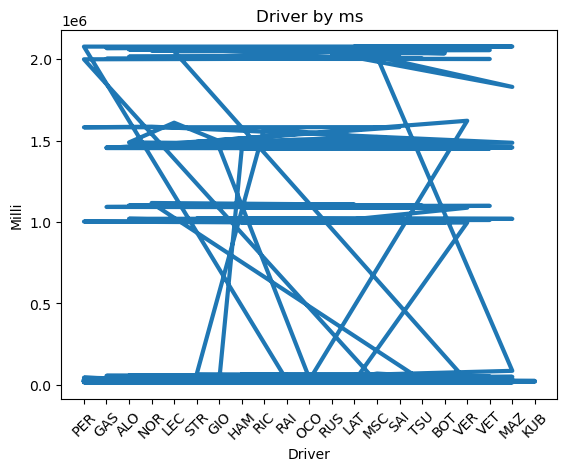

In [43]:
x = df3['code']
y = df3['milliseconds_y']


# Set the xlabel and ylabel, title using class methods
plt.title('Driver by ms')
plt.plot(x, y,linewidth=3,)
plt.xlabel('Driver')
plt.ylabel('Milli')
plt.xticks(rotation=45)

plt.show()

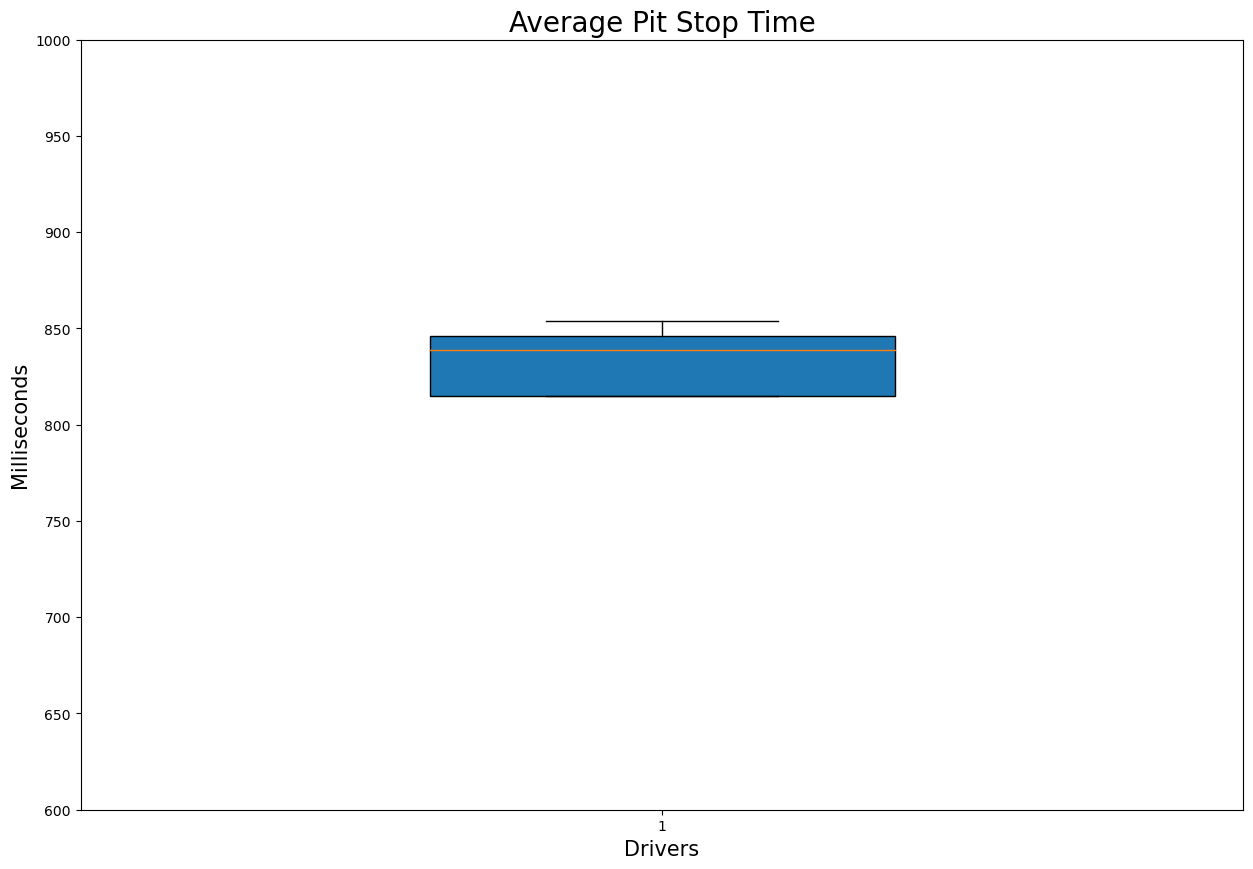

In [44]:
plot = [df3['driverId']]
Regimen= ['milliseconds_y']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Average Pit Stop Time',fontsize =20)
ax1.set_ylabel('Milliseconds',fontsize = 15)
ax1.set_xlabel('Drivers',fontsize = 15)
ax1.boxplot(plot, 0, 'gD', widths = 0.4, patch_artist=True,vert=True)
plt.ylim(600, 1000)
plt.show()

In [45]:
df3['milliseconds_y'].unique

<bound method Series.unique of 0      23993
1      38338
2      24373
3      24899
4      24925
       ...  
763    22661
764    21385
765    22070
766    21909
767    21920
Name: milliseconds_y, Length: 768, dtype: int64>

In [46]:
df3['milliseconds_y'].isna().sum()

0